<a href="https://colab.research.google.com/github/tudearimbawa/200030342/blob/main/Sales_Forecasting_UD_Sari_Jepun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Forecasting for UD. Sari Jepun

## Loading the Dataset and Preparing the Data

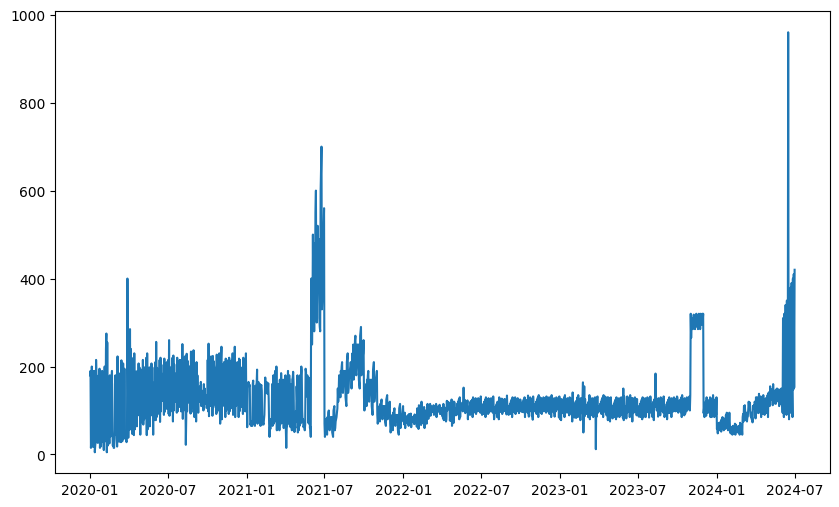

In [2]:

import pandas as pd
import matplotlib.pyplot as plt


# Load the Excel file
file_path = './harian tude.xlsx'
df = pd.read_excel(file_path)

df
# Rename columns for clarity
df.columns = ['Date', 'Sales']
df['Date'] = pd.to_datetime(df['Date'])

# # Set the date as the index
# df.set_index('Date', inplace=True)
# df['Date']
# # Clean the data by removing invalid date entries
df_cleaned = df[pd.to_datetime(df['Date'], errors='coerce').notna()]
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned.set_index('Date', inplace=True)

df_cleaned.head()

# make grafik of data

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned)



## Applying Winter's Method (Triple Exponential Smoothing)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


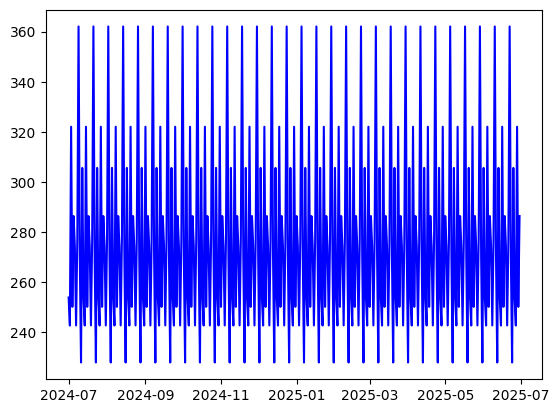

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Winter's method (Triple Exponential Smoothing)
winter_model = ExponentialSmoothing(df_cleaned['Sales'], seasonal='add', seasonal_periods=12).fit()
winter_forecast = winter_model.forecast(steps=365)

# Display the forecasted values
winter_forecast
# Plot Winter's forecast
plt.plot(winter_forecast.index, winter_forecast, label="Winter's Method Forecast", color='blue')


## Applying Single Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


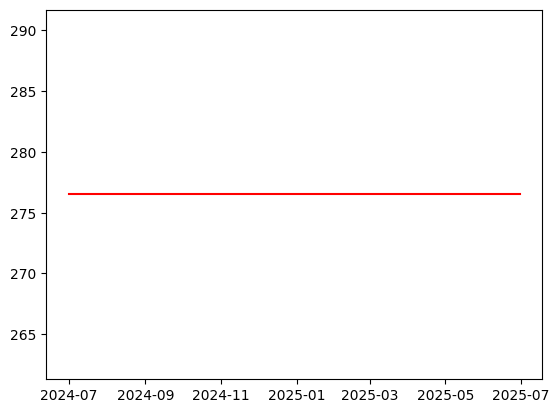

In [6]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Apply Single Exponential Smoothing
single_exp_model = SimpleExpSmoothing(df_cleaned['Sales']).fit(smoothing_level=0.2, optimized=False)
single_exp_forecast = single_exp_model.forecast(steps=365)

# Display the forecasted values
single_exp_forecast

# Plot Single Exponential Smoothing forecast
plt.plot(single_exp_forecast.index, single_exp_forecast, label="Single Exponential Smoothing Forecast", color='red')


## Applying SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


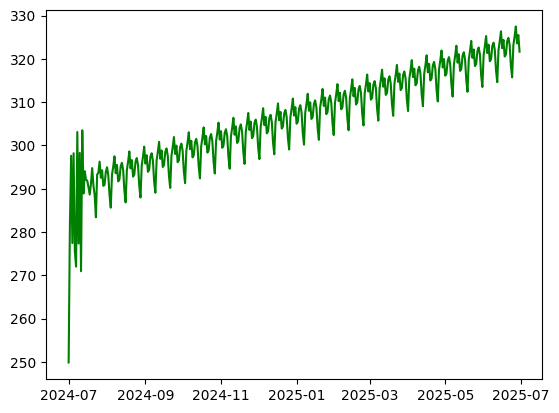

In [7]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(df_cleaned['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=365)
sarima_forecast_values = sarima_forecast.predicted_mean

# Display the forecasted values
sarima_forecast_values

# Plot SARIMA forecast
plt.plot(sarima_forecast_values.index, sarima_forecast_values, label='SARIMA Forecast', color='green')


## Comparing the Forecasts

In [8]:

# Combine the forecasts into a single DataFrame for comparison
forecast_df = pd.DataFrame({
    'Winter': winter_forecast,
    'Single_Exp_Smoothing': single_exp_forecast,
    'SARIMA': sarima_forecast_values
})

forecast_df

# export to excel
forecast_df.to_excel('forecast.xlsx')


## Plotting the Forecasts

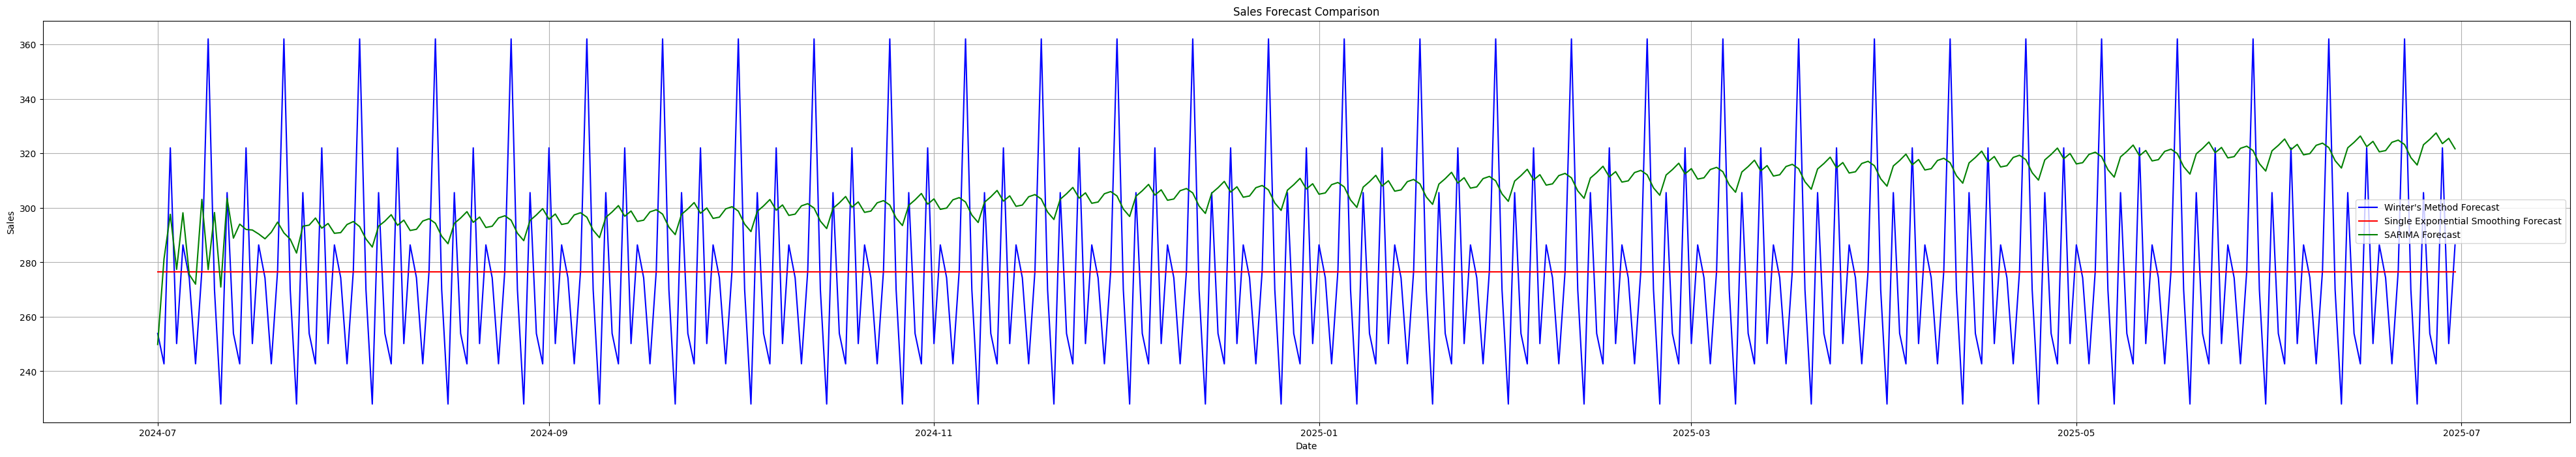

In [9]:

# Plot the forecast results
plt.figure(figsize=(50, 8))

# Plot actual sales
# plt.plot(df_cleaned.index[-50:], df_cleaned['Sales'][-50:], label='Actual Sales', color='black')

# Plot Winter's forecast
plt.plot(winter_forecast.index, winter_forecast, label="Winter's Method Forecast", color='blue')

# Plot Single Exponential Smoothing forecast
plt.plot(single_exp_forecast.index, single_exp_forecast, label="Single Exponential Smoothing Forecast", color='red')

# Plot SARIMA forecast
plt.plot(sarima_forecast_values.index, sarima_forecast_values, label='SARIMA Forecast', color='green')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast Comparison')
plt.legend()
plt.grid(True)
plt.show()


## Evaluating Forecast Accuracy

In [10]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate evaluation metrics for each forecasting method
actual_sales = df_cleaned['Sales'][-365:]  # Last year data for comparison

# Calculate evaluation metrics for Winter's method
mad_winter = mean_absolute_error(actual_sales, forecast_df['Winter'][:365])
mse_winter = mean_squared_error(actual_sales, forecast_df['Winter'][:365])
mape_winter = mean_absolute_percentage_error(actual_sales, forecast_df['Winter'][:365])

# Calculate evaluation metrics for Single Exponential Smoothing
mad_single_exp = mean_absolute_error(actual_sales, forecast_df['Single_Exp_Smoothing'][:365])
mse_single_exp = mean_squared_error(actual_sales, forecast_df['Single_Exp_Smoothing'][:365])
mape_single_exp = mean_absolute_percentage_error(actual_sales, forecast_df['Single_Exp_Smoothing'][:365])

# Calculate evaluation metrics for SARIMA
mad_sarima = mean_absolute_error(actual_sales, forecast_df['SARIMA'][:365])
mse_sarima = mean_squared_error(actual_sales, forecast_df['SARIMA'][:365])
mape_sarima = mean_absolute_percentage_error(actual_sales, forecast_df['SARIMA'][:365])

# Compile the results into a DataFrame
evaluation_metrics = pd.DataFrame({
    'MAD': [mad_winter, mad_single_exp, mad_sarima],
    'MSE': [mse_winter, mse_single_exp, mse_sarima],
    'MAPE': [mape_winter, mape_single_exp, mape_sarima]
}, index=['Winter', 'Single Exp Smoothing', 'SARIMA'])

evaluation_metrics

,MAD,MSE,MAPE
Winter,161.030782,30097.211526,1.698666
Single Exp Smoothing,160.010982,28759.053254,1.701933
SARIMA,183.676260,38319.552196,1.972574
